# Shear building data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import skew, kurtosis
import os
import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt
from scipy.signal import detrend
import pandas as pd
from scipy.fftpack import fft, fftfreq
from scipy.signal import peak_widths, peak_prominences
from scipy.io import loadmat
import seaborn as sns
from scipy.signal import spectrogram

In [2]:
def get_dataframes(path): # C:\Users\amroa\Documents\thesis\sheartable\damaged or undamaged
    
    # ignore this function
    def downsample_data(data, old_frequency=4096, new_frequency=2048):
        downsample_ratio = old_frequency // new_frequency
        # Ensure that the downsample_ratio is an integer.
        # If not, you might want to consider other resampling methods, like interpolation.
        assert downsample_ratio == int(downsample_ratio), f"Downsample ratio {downsample_ratio} is not an integer"
        downsample_ratio = int(downsample_ratio)
        # Use the Pandas DataFrame method .iloc to select every downsample_ratio-th row
        downsampled_data = data.iloc[::downsample_ratio].copy()
        return downsampled_data
    
    def bandpass_filter(data, lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs  # Nyquist frequency, which is half of fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        y = filtfilt(b, a, data)
        return y


    folder_path = path
    file_list = os.listdir(folder_path)
    dfs = [[],[]]
    # walk inside data folder
    for idx, filename in enumerate(file_list):
        print(f"Appending {filename} first")
        full_path = os.path.join(folder_path, filename)
        file_list2 = os.listdir(full_path)
        for filename2 in file_list2:
            df = pd.read_excel(os.path.join(full_path, filename2), index_col=None, header=list(range(11))) 
            detrended_df = df.apply(lambda x: detrend(x), axis=0)   
            filtered_df = detrended_df.apply(lambda x: bandpass_filter(x, 0.01, 100, 4096), axis=0) # introduces too many nans
            dfs[idx].append(filtered_df)
    return dfs


In [3]:
dfs = get_dataframes("C:\\Users\\amroa\\Documents\\thesis\\sheartable") # length 25 and 27 for damanged and undamaged

Appending damaged first
Appending undamaged first


In [11]:
# Reset column names
for el in dfs[0]:
    el.columns = range(7)
    el.columns = range(7)


In [14]:
undamaged = pd.concat(dfs[0], axis=0, ignore_index=True)
print(undamaged.shape)

(908527, 7)


In [10]:
cur = 0
for el in dfs[0]:
    print(el.shape)
    cur = cur + el.shape[0]

print(cur)

(39940, 7)
(45652, 7)
(42574, 7)
(37681, 7)
(35894, 7)
(28733, 7)
(30665, 7)
(29035, 7)
(27495, 7)
(39081, 7)
(31423, 7)
(46429, 7)
(30042, 7)
(30713, 7)
(28275, 7)
(34171, 7)
(35222, 7)
(27921, 7)
(61440, 7)
(40120, 7)
(22384, 7)
(32099, 7)
(42750, 7)
(45591, 7)
(43197, 7)
908527


In [14]:
example_df= dfs[0][4]
example_df.iloc[100:]

Unnamed: 0_level_0  \
      Unnamed: 0_level_1   
      Unnamed: 0_level_2   
      Unnamed: 0_level_3   
      Unnamed: 0_level_4   
      Unnamed: 0_level_5   
      Unnamed: 0_level_6   
      Unnamed: 0_level_7   
                    Time   
                Explicit   
                       s   
100                  NaN   
101                  NaN   
102                  NaN   
103                  NaN   
104                  NaN   
..                   ...   
35889     -6.546193e+156   
35890     -6.092994e+156   
35891     -5.644051e+156   
35892     -5.201579e+156   
35893     -4.767823e+156   

      SB17SEPDMR138_1 From 17-Sep-18 2:39:26 PM To 17-Sep-18 2:39:34 PM  \
                                                               Signal 1   
                                                    StreamedTimeHistory   
                                                     Unnamed: 1_level_3   
                                                                   m/s²   
                                                                   Real   
                                                           Acceleration   
                                                     Unnamed: 1_level_7   
                                                     Unnamed: 1_level_8   
                                                     Unnamed: 1_level_9   
                                                    Unnamed: 1_level_10   
100                                                  NaN                  
101                                                  NaN                  
102                                                  NaN                  
103                                                  NaN                  
104                                                  NaN                  
..                                                                  ...   
35889                                     -1.407677e+175                  
35890                                     -1.312795e+175                  
35891                                     -1.218387e+175                  
35892                                     -1.124951e+175                  
35893                                     -1.032997e+175                  

                                                                   \
                 Signal 2            Signal 3            Signal 4   
      StreamedTimeHistory StreamedTimeHistory StreamedTimeHistory   
       Unnamed: 2_level_3  Unnamed: 3_level_3  Unnamed: 4_level_3   
                     m/s²                m/s²                m/s²   
                     Real                Real                Real   
             Acceleration        Acceleration        Acceleration   
       Unnamed: 2_level_7  Unnamed: 3_level_7  Unnamed: 4_level_7   
       Unnamed: 2_level_8  Unnamed: 3_level_8  Unnamed: 4_level_8   
       Unnamed: 2_level_9  Unnamed: 3_level_9  Unnamed: 4_level_9   
      Unnamed: 2_level_10 Unnamed: 3_level_10 Unnamed: 4_level_10   
100                   NaN                 NaN                 NaN   
101                   NaN                 NaN                 NaN   
102                   NaN                 NaN                 NaN   
103                   NaN                 NaN                 NaN   
104                   NaN                 NaN                 NaN   
..                    ...                 ...                 ...   
35889      -1.872407e+175      -9.968204e+174      -4.310967e+175   
35890      -1.744453e+175      -9.265678e+174      -4.017827e+175   
35891      -1.617429e+175      -8.571767e+174      -3.726576e+175   
35892      -1.491983e+175      -7.889729e+174      -3.438722e+175   
35893      -1.368775e+175      -7.222852e+174      -3.155799e+175   

                                               
                 Signal 5            Signal 6  
      StreamedTimeHistory StreamedTimeHistory  
       Unnamed: 5_level_3  Unnamed: 6_level_3  
                     m/s²  

In [107]:
# 0.00024414 is the sampling interval -> sample rate 4096 Hz
# this method takes the dataframes and returns a large one lumped
def get_train_test(dfs, samples, train = 0.8): #  produces two numpy arrays, one for damaged the other for undamaged
    list_matrices = []
    for df in dfs:
        data = (df.to_numpy())[:, 1:7] # drop the first one since it shows time only
        list_matrices.append(data)

    all_data = np.vstack(list_matrices)
    nbr_instances = all_data.shape[0]//samples
    instances = np.array([all_data[i*samples: (i+1)*samples, : ] for i in range(nbr_instances)])

    # we use 80% of the instances for training and 20% for testing
    train_size = int(instances.shape[0]*train)
    train_data_one_class = instances[0:train_size]
    test_data_one_class = instances[train_size:]

    return train_data_one_class, test_data_one_class

In [108]:
train_damaged, test_damaged = get_train_test(dfs[0], 2048)
train_und, test_und = get_train_test(dfs[1], 2048)
train_damaged.shape, test_damaged.shape, train_und.shape, test_und.shape

((354, 2048, 6), (89, 2048, 6), (369, 2048, 6), (93, 2048, 6))

In [109]:
# create train and test data and save them
train_data = np.vstack([train_und, train_damaged])
train_labels = np.hstack(( np.zeros(train_und.shape[0]), np.ones(train_damaged.shape[0]) ))
# same for test
test_data = np.vstack([test_und, test_damaged])
test_labels = np.hstack(( np.zeros(test_und.shape[0]), np.ones(test_damaged.shape[0]) ))
# save all
np.save("building_723_2048_6.npy", train_data)
np.save("building_723_labels.npy", train_labels)

np.save("building_182_2048_6.npy", test_data)
np.save("building_723_labels.npy", test_labels)


In [110]:
# Vertically stack all DataFrames in the list
damaged_df = pd.concat(dfs[0], axis=0)
und_df = pd.concat(dfs[1], axis=0)
damaged_df.reset_index(drop=True, inplace=True)
und_df.reset_index(drop=True, inplace=True)

In [36]:
from scipy.signal import welch

def plot_pwelch(dfs_preprocessed):

    fs = 100 #  the sample rate
    title = "Power Spectral Density"

    fig, axes = plt.subplots(5, 1, figsize=(10, 6*5))
    fig.suptitle(title, fontsize=20, y = 1.006)

    # Loop through the subplots
    signals0 = [df.iloc[:, 0].values for df in dfs_preprocessed]
    for idx, ax in enumerate(axes):
        
        # The order is R1V, R2L, R2T, R2V, R3V
        signals = [df.iloc[:, idx].values for df in dfs_preprocessed]
        # signals = [signal[0:16384] for signal in signals] this was done to see how it would perform in the signal sample sizes we have in the training data

        # Plot 17 line plots on the current subplot
        for i in range(17):

            # This should be constant for all signals (around ~500,000)
            n = len(signals[i])

            freqs, amplitude_spectrum = welch(signals[i], fs,nperseg= 3000) # nperseg = 1000 for training to prevent noise with smaller sample sizes

            # cycle thru a colormap
            unique_color = plt.cm.jet(i / 17)
            
            sns.lineplot(x=freqs, y=(amplitude_spectrum), label=f'State {i+1}', color=unique_color, ax=ax)
            # sns.lineplot(x=freqs, y=(amplitude_spectrum)/(amplitude_spectrum0), label=f'State {i+1}', color=unique_color, ax=ax) # uncomment this for the transmissibility. For transmissibility also change set_xlim(2.5, 6) to set_xlim(1, 30)
            # sns.lineplot(x=freqs, y=(amplitude_spectrum), label=f'State {i+1}', color=unique_color, ax=ax)
            ax.set_xlabel('Frequency (Hz)')
            ax.set_ylabel('Amplitude')
            ax.set_title(f'PSD of DS Classes using {list_sensor_directions[idx]}')
            ax.legend(loc='upper right')
            ax.set_yscale("log") 
            ax.set_xlim(11, 14.5) # TODO: change to 2.5, 6 and take snapshot of R2T for the final report. Also do likewise for the transmissibility
            ax.set_ylim(10e-7,100)
            #print(len(freqs))# 1501 for nperseg of 3000

    plt.tight_layout()
    plt.show()
plot_pwelch(dfs_preprocessed)

In [37]:
np.all(np.isclose(x, x[0]))

True

In [38]:
x

array([0.00024414, 0.00024414, 0.00024414, ..., 0.00024414, 0.00024414,
       0.00024414])

In [38]:
# convert to numpy array for usage in the CNN
def pcolormesh_to_array(quadmesh):
    """
    Convert the image plotted by pcolormesh on an Axes instance to a 2D numpy array.

    Parameters:
    - ax: matplotlib.axes.Axes, the Axes instance containing the pcolormesh plot.

    Returns:
    - img_array: 2D numpy array, the image array.
    """

    # Get the data from the QuadMesh
    data_array = quadmesh.get_array().data

    # Get the number of rows and columns
    print(dir(quadmesh))
    #print(quadmesh.to_rgba())
    print(quadmesh.get_coordinates())
    print(quadmesh.get_coordinates().shape)
    print(dir(quadmesh.get_figure()))
    #nrows = np.max(quadmesh.get_coordinates()[])
    nrows = quadmesh.get_coordinates().shape[0] - 1
    ncols = quadmesh.get_coordinates().shape[1] - 1
    

    # Convert the 1D array back to the original 2D shape
    data_2d = data_array.reshape(nrows, ncols)

    # Get the colormap and normalization from the QuadMesh
    cmap = quadmesh.get_cmap()
    norm = quadmesh.norm

    # Convert the data to RGBA values
    rgba_data = cmap(norm(data_2d))

    # Create an image array by getting the RGB values
    img_array = rgba_data[:, :, :3]

    return img_array


['_A', '_PROPERTIES_EXCLUDED_FROM_SET', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_agg_filter', '_alias_map', '_alpha', '_animated', '_antialiased', '_antialiaseds', '_axes', '_bbox', '_bcast_lwls', '_callbacks', '_capstyle', '_clipon', '_clippath', '_cm_set', '_convert_mesh_to_paths', '_convert_mesh_to_triangles', '_coordinates', '_default_contains', '_edge_default', '_edge_is_mapped', '_edgecolors', '_face_is_mapped', '_facecolors', '_fully_clipped_to_axes', '_get_default_antialiased', '_get_default_edgecolor', '_get_default_facecolor', '_get_default_linewidth', '_gid', '_hatch', '_hatch_color', '_id_norm', '_in_layout', '_internal_update', '_joinstyle', '_label', '_line

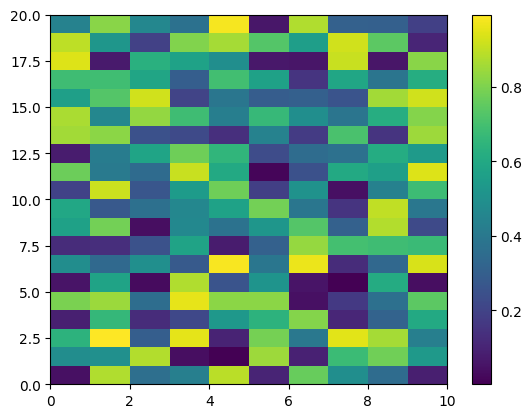

In [39]:
# Test
fig, ax = plt.subplots()
c = ax.pcolormesh(np.random.rand(20, 10))
plt.colorbar(c)
img_array = pcolormesh_to_array(c)

print(img_array.shape)  # Should print (10, 10, 3)

plt.show()